<hr style="margin-bottom: 40px;">

<img src="images/candlestick_chart.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Imbalance screener
Trading strategy reconginze place where is overbalance of buyers or sellers. This strategy is builded on base price action pattern Three white soldier and Three black crows.

### Recognize
* **Buying imbalance**: 3 and more consecutive green candles
* **Seller imbalance**: 3 and more consecutive red candles

- begin of imbalance is open price previous candle before 3 and more imbalance candles

[Follow SPY OHLC daily data in CSV Spreadsheet](data/NYSE_SPY_d.csv)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on!


In [90]:
import pandas as pd
import mplfinance as mpf
from tkinter.tix import HList


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Loading data

In [91]:
spy_ohlc_d = pd.read_csv("data/NYSE_SPY_d.csv", usecols= ["date","open","high","low","close"], parse_dates=["date"])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


## The data at a glance

In [92]:
spy_ohlc_d.head()

,date,open,high,low,close
0,2022-09-01 00:00:00-04:00,391.282691,395.156761,388.444344,394.798248
1,2022-09-02 00:00:00-04:00,398.642431,399.917194,388.733125,390.635315
2,2022-09-06 00:00:00-04:00,391.521707,392.507647,386.830984,389.161407
3,2022-09-07 00:00:00-04:00,388.832742,396.959363,388.603703,396.152679
4,2022-09-08 00:00:00-04:00,393.772459,399.220052,392.507635,398.742035


In [93]:
spy_ohlc_d.shape

(23, 5)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Compute buying imbalances

### Mark green candles

In [83]:
spy_ohlc_d["green"] = spy_ohlc_d["open"].lt(spy_ohlc_d["close"])

spy_ohlc_d.head()

,date,open,high,low,close,green,next_3days_green,red,next_3days_red
0,2022-09-01 00:00:00-04:00,391.282691,395.156761,388.444344,394.798248,True,False,False,False
1,2022-09-02 00:00:00-04:00,398.642431,399.917194,388.733125,390.635315,False,False,True,False
2,2022-09-06 00:00:00-04:00,391.521707,392.507647,386.830984,389.161407,False,False,True,False
3,2022-09-07 00:00:00-04:00,388.832742,396.959363,388.603703,396.152679,True,True,False,False
4,2022-09-08 00:00:00-04:00,393.772459,399.220052,392.507635,398.742035,True,True,False,False


### Decide 3 days consecutive green candles

In [84]:
spy_ohlc_d['next_3days_green'] = spy_ohlc_d[::-1].rolling(3)['green'].sum().eq(3)

spy_ohlc_d.head(35)

,date,open,high,low,close,green,next_3days_green,red,next_3days_red
0,2022-09-01 00:00:00-04:00,391.282691,395.156761,388.444344,394.798248,True,False,False,False
1,2022-09-02 00:00:00-04:00,398.642431,399.917194,388.733125,390.635315,False,False,True,False
2,2022-09-06 00:00:00-04:00,391.521707,392.507647,386.830984,389.161407,False,False,True,False
3,2022-09-07 00:00:00-04:00,388.832742,396.959363,388.603703,396.152679,True,True,False,False
4,2022-09-08 00:00:00-04:00,393.772459,399.220052,392.507635,398.742035,True,True,False,False
5,2022-09-09 00:00:00-04:00,401.092360,405.842865,400.813507,404.936584,True,False,False,False
6,2022-09-12 00:00:00-04:00,407.107684,410.045627,406.788985,409.288727,True,False,False,False
7,2022-09-13 00:00:00-04:00,400.186087,401.450911,390.316656,391.491821,False,False,True,False
8,2022-09-14 00:00:00-04:00,392.856214,394.579148,389.519913,392.985687,True,False,False,False
9,2022-09-15 00:00:00-04:00,391.352395,394.340122,387.189503,388.524017,False,False,True,False


### Find buyers imbalances


In [85]:

previous_open_price = 0
is_previous_candle_3days_green = False

buyer_imbalances = pd.DataFrame()

for index, row in spy_ohlc_d.iterrows():
    if row["next_3days_green"] == True and is_previous_candle_3days_green == False:
        start_imbalance = previous_open_price
        is_tested_imbalance = start_imbalance > spy_ohlc_d[index+3:]["low"].min() 

        imbalance_row = pd.DataFrame({
            "imbalance_date": [row["date"]],
            "imbalace_price": [start_imbalance],
            "is_tested": [is_tested_imbalance]
        })
        buyer_imbalances = pd.concat([buyer_imbalances, imbalance_row], ignore_index=True)
        #imbalances = imbalances.append(imbalance_row, ignore_index = True)
    
    previous_open_price = row["open"]
    is_previous_candle_3days_green = row["next_3days_green"]



buyer_imbalances

,imbalance_date,imbalace_price,is_tested
0,2022-09-07 00:00:00-04:00,391.521707,True


## Compute selling imbalances

### Mark red candles

In [86]:
spy_ohlc_d["red"] = spy_ohlc_d["open"].gt(spy_ohlc_d["close"])

spy_ohlc_d.head()

,date,open,high,low,close,green,next_3days_green,red,next_3days_red
0,2022-09-01 00:00:00-04:00,391.282691,395.156761,388.444344,394.798248,True,False,False,False
1,2022-09-02 00:00:00-04:00,398.642431,399.917194,388.733125,390.635315,False,False,True,False
2,2022-09-06 00:00:00-04:00,391.521707,392.507647,386.830984,389.161407,False,False,True,False
3,2022-09-07 00:00:00-04:00,388.832742,396.959363,388.603703,396.152679,True,True,False,False
4,2022-09-08 00:00:00-04:00,393.772459,399.220052,392.507635,398.742035,True,True,False,False


### Decide 3 days consecutive red candles

In [87]:
spy_ohlc_d['next_3days_red'] = spy_ohlc_d[::-1].rolling(3)['red'].sum().eq(3)

spy_ohlc_d.head(35)

,date,open,high,low,close,green,next_3days_green,red,next_3days_red
0,2022-09-01 00:00:00-04:00,391.282691,395.156761,388.444344,394.798248,True,False,False,False
1,2022-09-02 00:00:00-04:00,398.642431,399.917194,388.733125,390.635315,False,False,True,False
2,2022-09-06 00:00:00-04:00,391.521707,392.507647,386.830984,389.161407,False,False,True,False
3,2022-09-07 00:00:00-04:00,388.832742,396.959363,388.603703,396.152679,True,True,False,False
4,2022-09-08 00:00:00-04:00,393.772459,399.220052,392.507635,398.742035,True,True,False,False
5,2022-09-09 00:00:00-04:00,401.092360,405.842865,400.813507,404.936584,True,False,False,False
6,2022-09-12 00:00:00-04:00,407.107684,410.045627,406.788985,409.288727,True,False,False,False
7,2022-09-13 00:00:00-04:00,400.186087,401.450911,390.316656,391.491821,False,False,True,False
8,2022-09-14 00:00:00-04:00,392.856214,394.579148,389.519913,392.985687,True,False,False,False
9,2022-09-15 00:00:00-04:00,391.352395,394.340122,387.189503,388.524017,False,False,True,False


### Find sellers imbalances

In [88]:
previous_open_price = 0
is_previous_candle_3days_red = False

seller_imbalances = pd.DataFrame()

for index, row in spy_ohlc_d.iterrows():
    if row["next_3days_red"] == True and is_previous_candle_3days_red == False:
        start_imbalance = previous_open_price
        is_tested_imbalance = start_imbalance < spy_ohlc_d[index+3:]["high"].max() 

        imbalance_row = pd.DataFrame({
            "imbalance_date": [row["date"]],
            "imbalace_price": [start_imbalance],
            "is_tested": [is_tested_imbalance]
        })
        seller_imbalances = pd.concat([seller_imbalances, imbalance_row], ignore_index=True)
    
    previous_open_price = row["open"]
    is_previous_candle_3days_red = row["next_3days_red"]

seller_imbalances

,imbalance_date,imbalace_price,is_tested
0,2022-09-20 00:00:00-04:00,382.26001,False


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Visualization

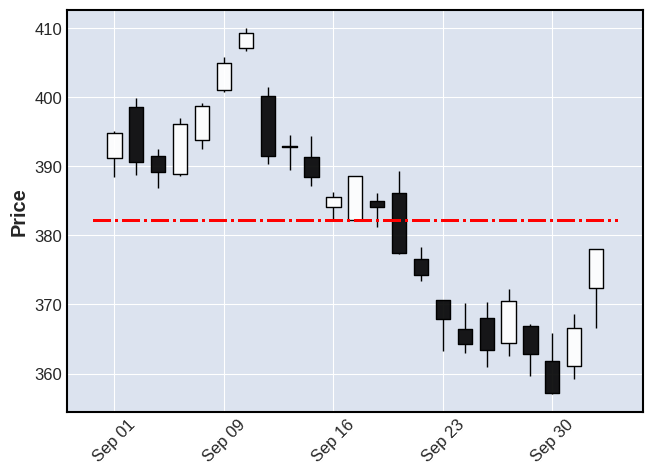

In [89]:
first_buyer_imbalance = buyer_imbalances["is_tested"] == False
first_buyer_imbalance.head()

first_buyer_imbalance = buyer_imbalances.loc[buyer_imbalances["is_tested"] == False].head(1)

buyer_imbalance_price = 0
if first_buyer_imbalance.shape[0] > 0:
    buyer_imbalance_price = first_buyer_imbalance["imbalace_price"].values[0]

first_seller_imbalance = seller_imbalances.loc[seller_imbalances["is_tested"] == False].head(1)

seller_imbalance_price = 0
if first_seller_imbalance.shape[0] > 0:
    seller_imbalance_price = first_seller_imbalance["imbalace_price"].values[0]


hlines = dict(hlines=[buyer_imbalance_price, seller_imbalance_price],colors=['g','r'],linestyle='-.')
if buyer_imbalance_price == 0:
    hlines = dict(hlines=[seller_imbalance_price],colors=['r'],linestyle='-.')

if seller_imbalance_price == 0:
    hlines = dict(hlines=[buyer_imbalance_price],colors=['g'],linestyle='-.')

if buyer_imbalance_price == 0 and seller_imbalance_price == 0:
    hlines = {}


mpf.plot(spy_ohlc_d.set_index("date"), hlines=hlines, type="candle")

## Resources

* [Order imbalance - investopedia.com](https://www.investopedia.com/terms/o/order-imbalance.asp)
* [Three white soldier pattern - investopedia.com](https://www.investopedia.com/terms/t/three_white_soldiers.asp)
* [Trhee black crows - investopedia.com](https://www.investopedia.com/terms/t/three_black_crows.asp)